In [5]:
import matplotlib.pyplot as plt
import numpy as np

import util
from linear_model import LinearModel

In [16]:
class LocallyWeightedLinearRegression(LinearModel):
    def __init__(self, tau):
        super(LocallyWeightedLinearRegression, self).__init__()
        self.tau = tau
        self.x = None
        self.y = None

    def fit(self, x, y):
        """Fit LWR by saving the training set.

        """
        # *** START CODE HERE ***
        self.x = x
        self.y = y
        # *** END CODE HERE ***

    def predict(self, x):
        """Make predictions given inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***         
        diff = x[:,None] - self.x
        diff_normed = np.linalg.norm(diff, ord=2, axis=2)         
        w = np.exp(diff_normed/(-2*np.power(self.tau,2)))
        W = np.apply_along_axis(np.diag, axis=1, arr=w)     
        theta = np.linalg.inv(self.x.T @ W @ self.x) @ self.x.T @ W @ self.y.reshape((-1,1))
        return (x[:,None] @ theta).reshape(-1)         
    
        
        # *** END CODE HERE ***

0.29296046066209097


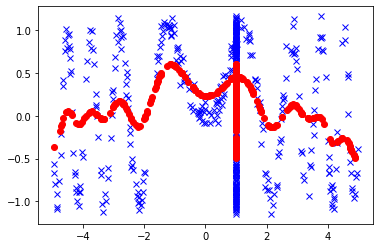

In [17]:
if __name__ == '__main__':
    tau=5e-1,
    train_path='../data/ds5_train.csv'
    eval_path='../data/ds5_valid.csv'
    # Load training set
    x_train, y_train = util.load_dataset(train_path, add_intercept=True)

    # *** START CODE HERE ***
    # Fit a LWR model
    model = LocallyWeightedLinearRegression(0.5)
    model.fit(x_train, y_train)
    # Get MSE value on the validation set
    x_val, y_val = util.load_dataset(eval_path, add_intercept=True)
    y_pred = model.predict(x_val)
    mse = ((y_pred - y_val) ** 2).mean()
    print(mse)
    
    # Plot validation predictions on top of training set
    # No need to save anything
    # Plot data
    
    import matplotlib.pyplot as plt
    plt.figure()
    plt.plot(x_train, y_train, 'bx')
    plt.plot(x_val, y_pred, 'ro')
    plt.show()
    
    # *** END CODE HERE ***


0.01364830948508898


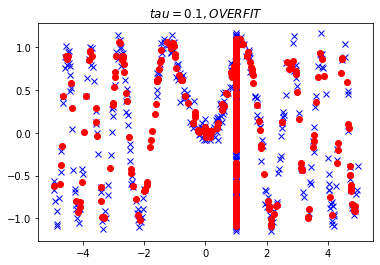

In [32]:
if __name__ == '__main__':
    tau_values=[3e-2, 5e-2, 1e-1, 5e-1, 1e0, 1e1]
    train_path='../data/ds5_train.csv'
    valid_path='../data/ds5_valid.csv'
    test_path='../data/ds5_test.csv'
    pred_path='../output/p05c_pred.txt'
    # Load training set
    x_train, y_train = util.load_dataset(train_path, add_intercept=True)
    tau = tau_values[2]
    model = LocallyWeightedLinearRegression(tau)
    model.fit(x_train, y_train)
    # Get MSE value on the validation set
    x_val, y_val = util.load_dataset(eval_path, add_intercept=True)
    y_pred = model.predict(x_val)
    mse = ((y_pred - y_val) ** 2).mean()
    print(mse)
    
    np.savetxt(pred_path, y_pred)
    plt.figure()
    plt.title('$tau = {}, OVERFIT$'.format(tau))
    plt.plot(x_train, y_train, 'bx')
    #plt.plot(x_test, y_pred, 'ro')
    plt.plot(x_val, y_pred, 'ro')
    plt.savefig('../output/final.png')
    # *** END CODE HERE ***

0.29296046066209097


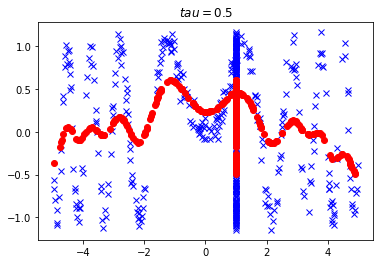

In [45]:
tau = tau_values[3]
model = LocallyWeightedLinearRegression(tau)
model.fit(x_train, y_train)
# Get MSE value on the validation set
x_val, y_val = util.load_dataset(eval_path, add_intercept=True)
y_pred = model.predict(x_val)
mse = ((y_pred - y_val) ** 2).mean()
print(mse)
    
np.savetxt(pred_path, y_pred)
plt.figure()
plt.title("Test", fontname="Times New Roman")
plt.title('$tau = {}$'.format(tau))
plt.plot(x_train, y_train, 'bx')
#plt.plot(x_test, y_pred, 'ro')
plt.plot(x_val, y_pred, 'ro')
plt.savefig('../output/final.png')